# 0) Preparacão do ambiente

In [1]:
!pip install import-ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


In [2]:
import import_ipynb
from google.colab import drive

drive.mount("mnt")

%cd "mnt/My Drive/Colab Notebooks/TCC"



Mounted at mnt
/content/mnt/My Drive/Colab Notebooks/TCC


In [3]:
!rm "Planilha_Ativos.xlsx"
!rm "dados_retornos_Dataframe_Portfolio.csv"
!rm "dados_retornos_Dataframe_Portfolio_NaN.csv"
!rm 'dados_benchmark_IBOVESPA.csv'
!rm 'dados_benchmark_IPCA.csv'
!rm 'dados_benchmark_SELIC.csv'
!rm 'dados_benchmark_Dolar.csv'
!rm 'restricoes.csv'
!rm 'carteira_investidor.csv'
!rm 'dados_renda_variavel.csv'
!rm 'cotacoes_rf.csv'
!rm 'cotacoes_rv.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
import Estrategia_Alocacao
import Dados_Titulos_Publicos
import Dados_Planilha_Ativos
import Dados_benchmark
import Dados_Ativos_Renda_Variavel
# import Funcoes_Apoio
import OtimizadorCVM
import OtimizadorPR
import OtimizadorNaive

import funcoes_apoio as Funcoes_Apoio

# Funcoes_Apoio = funcoes_apoio

importing Jupyter notebook from Estrategia_Alocacao.ipynb
importing Jupyter notebook from Dados_Titulos_Publicos.ipynb
importing Jupyter notebook from Dados_Planilha_Ativos.ipynb
importing Jupyter notebook from Dados_benchmark.ipynb
importing Jupyter notebook from Dados_Ativos_Renda_Variavel.ipynb
importing Jupyter notebook from OtimizadorCVM.ipynb
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00
importing Jupyter notebook from OtimizadorPR.ipynb
importing Jupyter notebook from OtimizadorNaive.ipynb


In [6]:
# Definição do período
data_inicio = '2010-01-01'
data_fim = '2023-12-31'

# 1) Importação dos dados:



## 1.1 - Dados dos retornos dos ativos da planilha e dos benchmarks (IBOVESPA, Dólar, IPCA e SELIC)

In [7]:
Funcoes_Apoio.importar_dados(Dados_Planilha_Ativos, Dados_Ativos_Renda_Variavel,Dados_Titulos_Publicos, Dados_benchmark,data_inicio,data_fim)

Saving Planilha_Ativos.xlsx to Planilha_Ativos.xlsx
Ações
FII
Renda Fixa
Restrições
Carteira Investidor
[*********************100%%**********************]  52 of 52 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  52 of 52 completed
[*********************100%%**********************]  7 of 7 completed


### 1.1.1 - Portfólio da planilha (Sem tratamento de dados)

In [8]:
df_portfolio_NaN = Funcoes_Apoio.CriarDataFrameFromCSV("dados_retornos_Dataframe_Portfolio_NaN.csv")
df_portfolio_NaN.set_index('Date', inplace=True)
df_portfolio_NaN

,AALR3.SA,ABEV3.SA,ADHM3.SA,AERI3.SA,AESB3.SA,AFLT3.SA,AGRO3.SA,AGXY3.SA,AHEB3.SA,ALPA3.SA,...,WEGE3.SA,ALMI11.SA,EURO11.SA,FLMA11.SA,HGBS11.SA,HGLG11.SA,HGRE11.SA,VERE11.SA,Tesouro IPCA+ 2024,Tesouro IPCA+ 2035
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-31,NaN,0.29,-0.23,NaN,NaN,-0.29,-0.12,NaN,-0.54,0.20,...,-0.12,NaN,-0.05,NaN,NaN,NaN,0.17,NaN,0.17,0.11
2012-12-31,NaN,0.59,0.00,NaN,NaN,-0.09,0.03,NaN,0.62,0.34,...,0.48,NaN,0.28,NaN,NaN,0.10,0.20,NaN,0.36,0.49
2013-12-31,NaN,0.05,-0.78,NaN,NaN,0.31,-0.04,NaN,-0.25,-0.02,...,0.18,NaN,-0.29,NaN,-0.27,-0.16,-0.21,NaN,-0.17,-0.32
2014-12-31,NaN,-0.02,-0.76,NaN,NaN,-0.22,-0.04,NaN,0.00,-0.42,...,0.31,NaN,0.03,NaN,-0.08,0.02,-0.13,NaN,0.17,0.21
2015-12-31,NaN,0.20,-0.39,NaN,NaN,0.04,0.36,NaN,-0.00,0.54,...,0.00,NaN,-0.11,-0.05,-0.05,-0.09,-0.07,NaN,0.06,-0.05
2016-12-31,NaN,-0.05,0.64,NaN,NaN,0.39,0.06,NaN,2.08,-0.05,...,0.06,NaN,0.19,0.21,0.46,0.10,0.10,NaN,0.27,0.51
2017-12-31,0.01,0.33,-0.35,NaN,NaN,0.72,0.15,NaN,1.27,0.97,...,0.58,NaN,0.04,0.27,0.17,0.24,0.17,NaN,0.14,0.15
2018-12-31,-0.10,-0.25,-0.27,NaN,NaN,0.15,0.32,NaN,-0.26,-0.01,...,-0.04,NaN,-0.13,-0.01,0.01,0.04,0.04,NaN,0.13,0.17
2019-12-31,0.37,0.25,0.75,NaN,NaN,1.01,0.28,NaN,-0.53,1.11,...,1.01,NaN,0.24,0.80,0.26,0.47,0.33,NaN,0.19,0.39


### 1.1.2 - Portfólio da planilha (Com tratamento de dados)

In [9]:
df_portfolio = Funcoes_Apoio.CriarDataFrameFromCSV("dados_retornos_Dataframe_Portfolio.csv")
df_portfolio.set_index('Date', inplace=True)
df_portfolio

,ABEV3.SA,ADHM3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,ALPA3.SA,AMAR3.SA,AMER3.SA,ARZZ3.SA,ATOM3.SA,...,SUZB3.SA,TAEE11.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,EURO11.SA,HGLG11.SA,HGRE11.SA,Tesouro IPCA+ 2024,Tesouro IPCA+ 2035
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-31,0.29,-0.23,-0.29,-0.12,-0.54,0.20,-0.32,-0.71,0.16,-0.44,...,0.27,0.36,-0.25,0.46,-0.12,-0.05,0.05,0.17,0.17,0.11
2012-12-31,0.59,0.00,-0.09,0.03,0.62,0.34,0.91,0.89,0.73,-0.50,...,0.00,0.87,0.13,-0.04,0.48,0.28,0.10,0.20,0.36,0.49
2013-12-31,0.05,-0.78,0.31,-0.04,-0.25,-0.02,-0.43,-0.10,-0.23,1.00,...,0.00,-0.10,-0.13,-0.01,0.18,-0.29,-0.16,-0.21,-0.17,-0.32
2014-12-31,-0.02,-0.76,-0.22,-0.04,0.00,-0.42,-0.22,0.59,-0.08,-0.58,...,0.01,0.14,-0.35,0.09,0.31,0.03,0.02,-0.13,0.17,0.21
2015-12-31,0.20,-0.39,0.04,0.36,-0.00,0.54,-0.63,-0.32,-0.19,4.37,...,0.01,-0.02,-0.37,-0.09,0.00,-0.11,-0.09,-0.07,0.06,-0.05
2016-12-31,-0.05,0.64,0.39,0.06,2.08,-0.05,0.23,-0.33,0.23,-0.26,...,0.01,0.42,0.98,0.12,0.06,0.19,0.10,0.10,0.27,0.51
2017-12-31,0.33,-0.35,0.72,0.15,1.27,0.97,0.22,1.06,1.28,0.14,...,-0.06,0.12,0.64,0.22,0.58,0.04,0.24,0.17,0.14,0.15
2018-12-31,-0.25,-0.27,0.15,0.32,-0.26,-0.01,-0.28,1.05,0.03,-0.28,...,1.05,0.26,0.32,0.09,-0.04,-0.13,0.04,0.04,0.13,0.17
2019-12-31,0.25,0.75,1.01,0.28,-0.53,1.11,1.56,0.51,0.19,-0.32,...,0.06,0.41,0.07,0.26,1.01,0.24,0.47,0.33,0.19,0.39


### 1.1.3 - Dados benchmark IBOVESPA

In [10]:
df_dados_benchmark_IBOVESPA = Funcoes_Apoio.CriarDataFrameFromCSV("dados_benchmark_IBOVESPA.csv")
df_dados_benchmark_IBOVESPA.set_index('Date', inplace=True)
df_dados_benchmark_IBOVESPA.rename(columns = {'Adj Close':'IBOV'}, inplace = True)
df_dados_benchmark_IBOVESPA

,IBOV
Date,
2011-12-31,-0.181098
2012-12-31,0.073968
2013-12-31,-0.154958
2014-12-31,-0.029122
2015-12-31,-0.133121
2016-12-31,0.389319
2017-12-31,0.268567
2018-12-31,0.150323
2019-12-31,0.319467


### 1.1.4 - Dados benchmark IPCA

In [11]:
df_dados_benchmark_IPCA = Funcoes_Apoio.CriarDataFrameFromCSV("dados_benchmark_IPCA.csv")
df_dados_benchmark_IPCA.set_index('ano',inplace=True)
df_dados_benchmark_IPCA.index.names = ['Date']
df_dados_benchmark_IPCA.index = df_dados_benchmark_IBOVESPA.index
df_dados_benchmark_IPCA.drop(columns=['Unnamed: 0'],inplace=True)
df_dados_benchmark_IPCA.rename(columns = {'valor':'IPCA'}, inplace = True)
df_dados_benchmark_IPCA

,IPCA
Date,
2011-12-31,0.0650
2012-12-31,0.0584
2013-12-31,0.0591
2014-12-31,0.0641
2015-12-31,0.1067
2016-12-31,0.0629
2017-12-31,0.0295
2018-12-31,0.0375
2019-12-31,0.0431


### 1.1.5 - Dados benchmark SELIC

In [12]:
df_dados_benchmark_SELIC = Funcoes_Apoio.CriarDataFrameFromCSV("dados_benchmark_SELIC.csv")
df_dados_benchmark_SELIC.set_index('data',inplace=True)
df_dados_benchmark_SELIC.index.names = ['Date']
df_dados_benchmark_SELIC.rename(columns = {'valor':'SELIC'}, inplace = True)
df_dados_benchmark_SELIC

,SELIC
Date,
2011-12-31,0.1100
2012-12-31,0.0725
2013-12-31,0.1000
2014-12-31,0.1175
2015-12-31,0.1425
2016-12-31,0.1375
2017-12-31,0.0700
2018-12-31,0.0650
2019-12-31,0.0450


### 1.1.6 - Dados benchmark Dólar

In [13]:
df_dados_benchmark_Dolar = Funcoes_Apoio.CriarDataFrameFromCSV("dados_benchmark_Dolar.csv")
df_dados_benchmark_Dolar.set_index('data',inplace=True)
df_dados_benchmark_Dolar.index.names = ['Date']
df_dados_benchmark_Dolar.rename(columns = {'valor':'Dólar'}, inplace = True)
df_dados_benchmark_Dolar

,Dólar
Date,
2011-12-31,0.125795
2012-12-31,0.089402
2013-12-31,0.146367
2014-12-31,0.133868
2015-12-31,0.470070
2016-12-31,-0.165361
2017-12-31,0.015004
2018-12-31,0.171342
2019-12-31,0.040234


## 1.2 - Restrições


In [14]:
df_restricoes = Funcoes_Apoio.CriarDataFrameFromCSV("restricoes.csv")
df_restricoes.set_index('Restricao',inplace=True)
df_restricoes.drop(columns=['Unnamed: 0'],inplace=True)
df_restricoes

,Valor
Restricao,
Quantidade de ativos,40
Coeficiente de Aversão ao Risco,5


## 1.3 - Carteira Investidor

In [15]:
df_carteira_investidor = Funcoes_Apoio.CriarDataFrameFromCSV("carteira_investidor.csv")
df_carteira_investidor.drop(columns=['Unnamed: 0'],inplace=True)
df_carteira_investidor = df_carteira_investidor[:-1]
df_carteira_investidor.set_index('Ativo', inplace=True)
df_carteira_investidor

,Pesos
Ativo,
BBDC3,0.0125
BOVA11,0.0500
CGAS3,0.0125
CIEL3,0.0125
CMIG3,0.0125
CPLE3,0.0125
CSAN3,0.0125
CSNA3,0.0125
CYRE3,0.0125


# 2) Geração dos portfólios

## 2.1 - Definindo o período de corte de 5 anos para a otimização

In [16]:
df_portfolio_otimizacao = df_portfolio.loc['2011-12-31':'2015-12-31']
df_portfolio_otimizacao

,ABEV3.SA,ADHM3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,ALPA3.SA,AMAR3.SA,AMER3.SA,ARZZ3.SA,ATOM3.SA,...,SUZB3.SA,TAEE11.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,EURO11.SA,HGLG11.SA,HGRE11.SA,Tesouro IPCA+ 2024,Tesouro IPCA+ 2035
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-31,0.29,-0.23,-0.29,-0.12,-0.54,0.20,-0.32,-0.71,0.16,-0.44,...,0.27,0.36,-0.25,0.46,-0.12,-0.05,0.05,0.17,0.17,0.11
2012-12-31,0.59,0.00,-0.09,0.03,0.62,0.34,0.91,0.89,0.73,-0.50,...,0.00,0.87,0.13,-0.04,0.48,0.28,0.10,0.20,0.36,0.49
2013-12-31,0.05,-0.78,0.31,-0.04,-0.25,-0.02,-0.43,-0.10,-0.23,1.00,...,0.00,-0.10,-0.13,-0.01,0.18,-0.29,-0.16,-0.21,-0.17,-0.32
2014-12-31,-0.02,-0.76,-0.22,-0.04,0.00,-0.42,-0.22,0.59,-0.08,-0.58,...,0.01,0.14,-0.35,0.09,0.31,0.03,0.02,-0.13,0.17,0.21
2015-12-31,0.20,-0.39,0.04,0.36,-0.00,0.54,-0.63,-0.32,-0.19,4.37,...,0.01,-0.02,-0.37,-0.09,0.00,-0.11,-0.09,-0.07,0.06,-0.05


## 2.2 - Setando as variáveis

In [17]:
RESTRICAO_QTD_ATIVOS = df_restricoes.loc['Quantidade de ativos'][0]
RESTRICAO_COEFICIENTE_AVERSAO_RISCO = df_restricoes.loc['Coeficiente de Aversão ao Risco'][0]

In [18]:
listaCVM = OtimizadorCVM.Setar_variaveis(  Funcoes_Apoio,Estrategia_Alocacao, df_portfolio_otimizacao, RESTRICAO_QTD_ATIVOS, RESTRICAO_COEFICIENTE_AVERSAO_RISCO)

listaPR = OtimizadorPR.Setar_variaveis(  Funcoes_Apoio,Estrategia_Alocacao, df_portfolio_otimizacao, RESTRICAO_QTD_ATIVOS, RESTRICAO_COEFICIENTE_AVERSAO_RISCO)

listaNaive = OtimizadorNaive.Setar_variaveis(  Funcoes_Apoio,Estrategia_Alocacao, df_portfolio_otimizacao, RESTRICAO_QTD_ATIVOS, RESTRICAO_COEFICIENTE_AVERSAO_RISCO)

## 2.3 - CVM (Carteira de Variância Mínima)

### 2.3.1 - Executando a otimização CVM

In [19]:
melhor_individuoCVM = OtimizadorCVM.otimizar_selecaoativos()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


gen	nevals	avg        	std       	min       	max      
0  	1001  	4.41456e-05	0.00258812	-0.0510899	0.0963656


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


1  	920   	2.08229e-05	0.00283078	-0.0510899	0.0963656


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2  	909   	8.26872e-05	0.00385079	-0.0510899	0.119715 


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


3  	898   	3.37211e-05	0.00265656	-0.0510899	0.0795506


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


4  	916   	5.90124e-05	0.00392893	-0.0510899	0.11562  


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x wer

5  	916   	2.65542e-05	0.00475609	-0.0560881	0.11562  


### 2.3.2 - Melhor indivíduo CVM

In [20]:

melhor_individuoCVM

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1]

### 2.3.3 - Melhor retorno CVM

In [21]:
OtimizadorCVM.FuncaoObjetivo(melhor_individuoCVM)

(0.11971457242269284, 0.061468384625333904)

### 2.3.4 - Carteira obtida com a estratégia CVM

In [22]:
OtimizadorCVM.PESOS_CVM[0]

,0
ELET3.SA,0.246530
VIVT3.SA,0.142235
CMIG3.SA,0.086776
Tesouro IPCA+ 2035,0.036844
LREN3.SA,0.027752
Tesouro IPCA+ 2024,0.027240
ATOM3.SA,0.022674
EURO11.SA,0.021829
JBSS3.SA,0.021638
HGRE11.SA,0.018220


## 2.4 - PR (Paridade de Risco)

### 2.4.1 - Executando a otimização PR

In [23]:
melhor_individuoPR = OtimizadorPR.otimizar_selecaoativos()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


gen	nevals	avg        	std       	min       	max      
0  	1001  	2.35693e-05	0.00171093	-0.0251323	0.0723179


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


1  	911   	5.89357e-05	0.00251194	-0.0235076	0.0835893


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2  	906   	0.00010065 	0.00340122	-0.0283935	0.0835893


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


3  	914   	0.000232405	0.00512686	-0.0283935	0.140239 


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


4  	919   	0.000596282	0.011078  	-0.0309424	0.330417 


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x wer

5  	925   	0.0011035  	0.0134754 	-0.115439 	0.224107 


### 2.4.2 - Melhor indivíduo PR

In [24]:
melhor_individuoPR

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1]

### 2.4.3 - Melhor retorno PR

In [25]:
OtimizadorPR.FuncaoObjetivo(melhor_individuoPR)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


(0.33041707592533576, 0.26058465335625636)

### 2.4.4 - Carteira obtida com a estratégia PR

In [26]:
OtimizadorPR.PESOS_PR[0]

,0
CIEL3.SA,0.115628
BAHI3.SA,0.114465
HGLG11.SA,0.077648
EGIE3.SA,0.060877
EMBR3.SA,0.049437
ATOM3.SA,0.037635
ITUB3.SA,0.037041
AFLT3.SA,0.032096
ITSA3.SA,0.031928
PETR3.SA,0.031828


## 2.5 - Estratégia Ingênua (Naïve)

### 2.5.1 - Executando a otimização Naïve

In [27]:
melhor_individuoNaive = OtimizadorNaive.otimizar_selecaoativos()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg        	std        	min       	max    
0  	1001  	2.15043e-07	0.000712288	-0.0223195	0.02275
1  	909   	-4.61478e-05	0.00204123 	-0.0681794	0.02275
2  	922   	1.21252e-05 	0.0014331  	-0.0223195	0.0315 
3  	928   	1.50591e-05 	0.00142972 	-0.0223195	0.0315 
4  	926   	4.11681e-05 	0.00189845 	-0.0223195	0.0315 
5  	910   	8.14357e-05 	0.00250063 	-0.0223195	0.0315 


### 2.5.2 - Melhor indivíduo Naïve

In [28]:
melhor_individuoNaive

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

### 2.5.3 - Melhor retorno Naïve

In [29]:
OtimizadorNaive.FuncaoObjetivo(melhor_individuoNaive)

(0.03150000000000001, -0.008516906250000005)

### 2.5.4 - Carteira obtida com a estratégia Naïve

In [30]:
OtimizadorNaive.PESOS_NAIVE[0]

,0
,
ADHM3.SA,0.025
AFLT3.SA,0.025
AGRO3.SA,0.025
AHEB3.SA,0.025
ALPA3.SA,0.025
AMER3.SA,0.025
ARZZ3.SA,0.025
ATOM3.SA,0.025
BAHI3.SA,0.025


## 2.6 - Carteira do investidor

### 2.6.1 - Pesos de cada ativo na carteira

In [31]:
df_pesos_carteira_investidor = Funcoes_Apoio.acertar_pesos_carteira_investidor( df_carteira_investidor, df_portfolio_otimizacao)
df_pesos_carteira_investidor

,Pesos
ABEV3.SA,0.0125
ARZZ3.SA,0.0125
B3SA3.SA,0.0125
BBAS3.SA,0.0125
BBDC3.SA,0.0125
BOVA11.SA,0.0500
CGAS3.SA,0.0125
CIEL3.SA,0.0125
CMIG3.SA,0.0125
CPLE3.SA,0.0125


### 2.6.2 - Retorno da carteira investidor

In [32]:
portfolio_carteira_investidor = Funcoes_Apoio.Gerar_retorno_por_ativo_portfolio(df_pesos_carteira_investidor)
df_portfolio_carteira_investidor = pd.DataFrame(portfolio_carteira_investidor)

In [33]:
retorno_carteira_investidor = Funcoes_Apoio.RetornoPortfolio(df_pesos_carteira_investidor,df_portfolio_carteira_investidor)
retorno_carteira_investidor

0.0125

#3 - Comparação entre os portfólios CVM, PR, Naïve, carteira do investidor e os benchmarks a partir de um período subsequente ao utilizado na otimização

## 3.1 - Definição do período de avaliação das carteiras

In [34]:
df_portfolio_teste = df_portfolio.loc['2016-12-31':'2020-12-31']
df_portfolio_teste

,ABEV3.SA,ADHM3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,ALPA3.SA,AMAR3.SA,AMER3.SA,ARZZ3.SA,ATOM3.SA,...,SUZB3.SA,TAEE11.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,EURO11.SA,HGLG11.SA,HGRE11.SA,Tesouro IPCA+ 2024,Tesouro IPCA+ 2035
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-31,-0.05,0.64,0.39,0.06,2.08,-0.05,0.23,-0.33,0.23,-0.26,...,0.01,0.42,0.98,0.12,0.06,0.19,0.10,0.10,0.27,0.51
2017-12-31,0.33,-0.35,0.72,0.15,1.27,0.97,0.22,1.06,1.28,0.14,...,-0.06,0.12,0.64,0.22,0.58,0.04,0.24,0.17,0.14,0.15
2018-12-31,-0.25,-0.27,0.15,0.32,-0.26,-0.01,-0.28,1.05,0.03,-0.28,...,1.05,0.26,0.32,0.09,-0.04,-0.13,0.04,0.04,0.13,0.17
2019-12-31,0.25,0.75,1.01,0.28,-0.53,1.11,1.56,0.51,0.19,-0.32,...,0.06,0.41,0.07,0.26,1.01,0.24,0.47,0.33,0.19,0.39
2020-12-31,-0.14,-0.28,-0.03,0.36,-0.34,0.38,-0.49,0.20,0.07,0.93,...,0.48,0.20,0.71,0.06,1.20,0.05,-0.12,-0.21,0.10,0.08


## 3.2 - Carteira PR

In [35]:
df_carteira_pr_retorno_por_ano = Funcoes_Apoio.gerar_retorno_portfolio_por_ano('PR',OtimizadorPR.PESOS_PR[0],df_portfolio_teste)

## 3.3 - Carteira CVM

In [36]:
df_carteira_cvm_retorno_por_ano = Funcoes_Apoio.gerar_retorno_portfolio_por_ano('CVM',OtimizadorCVM.PESOS_CVM[0],df_portfolio_teste)

## 3.4 - Carteira Naïve

In [37]:
df_carteira_naive_retorno_por_ano = Funcoes_Apoio.gerar_retorno_portfolio_por_ano('Naive',OtimizadorNaive.PESOS_NAIVE[0],df_portfolio_teste)

## 3.5 - Carteira do Investidor

In [38]:
df_carteira_investidor_retorno_por_ano = Funcoes_Apoio.gerar_retorno_portfolio_por_ano('Investidor',df_pesos_carteira_investidor,df_portfolio_teste)

## 3.6 - Resultados

In [39]:
resultado = Funcoes_Apoio.apresentacao_resultados(df_carteira_pr_retorno_por_ano,df_carteira_cvm_retorno_por_ano,df_carteira_naive_retorno_por_ano,df_carteira_investidor_retorno_por_ano,df_dados_benchmark_IBOVESPA,df_dados_benchmark_IPCA,df_dados_benchmark_SELIC,df_dados_benchmark_Dolar)
resultado

,PR,CVM,Naive,Investidor,IBOV,IPCA,SELIC,Dólar
Date,,,,,,,,
2016-12-31,0.231771,0.966817,0.3995,0.418500,0.389319,0.0629,0.1375,-0.165361
2017-12-31,0.344218,0.163998,0.3985,0.221750,0.268567,0.0295,0.0700,0.015004
2018-12-31,0.198272,0.244882,0.1725,0.164875,0.150323,0.0375,0.0650,0.171342
2019-12-31,0.309798,0.394879,0.4030,0.382875,0.319467,0.0431,0.0450,0.040234
2020-12-31,-0.046774,0.091767,0.0950,0.072375,0.028819,0.0452,0.0200,0.289280


In [40]:
resultado.sum().sort_values(ascending=False)

CVM           1.862342
Naive         1.468500
Investidor    1.260375
IBOV          1.156496
PR            1.037284
Dólar         0.350500
SELIC         0.337500
IPCA          0.218200
dtype: float64

### 3.6.1 - Gráfico ano-a-ano

In [41]:
resultado_index = resultado.index
resultado_index
resultado_grafico = resultado
resultado_grafico['Ano'] =  resultado_index

In [42]:
dfm = resultado_grafico.melt('Ano', var_name='Carteiras/Benchmarks', value_name='Retorno %')

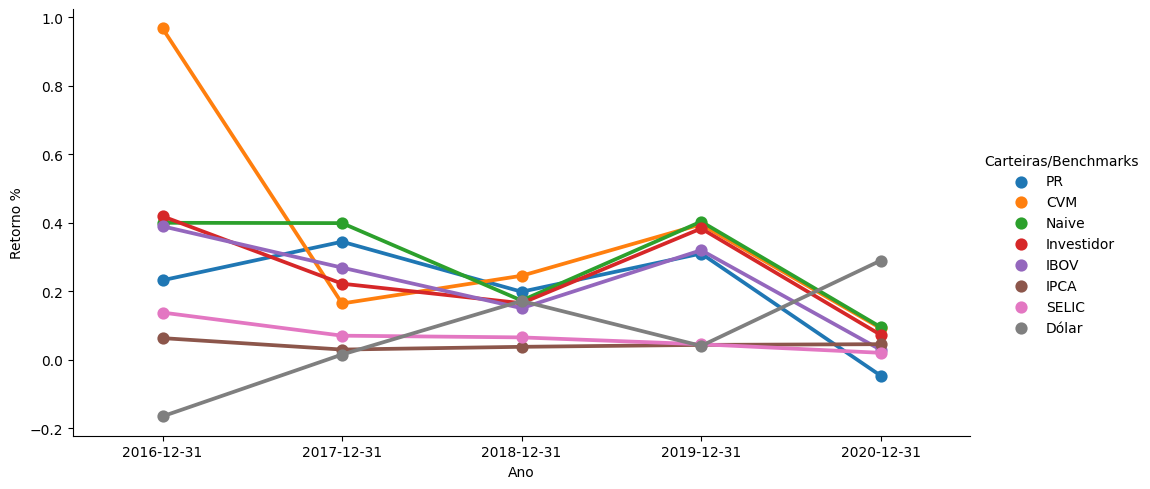

In [43]:
sns.catplot(x="Ano", y="Retorno %", hue='Carteiras/Benchmarks', data=dfm, kind='point' , height=5, aspect=2)